## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

## Try the Wine dataset

In [2]:
wine = datasets.load_wine()
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [3]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1, random_state=4)
logreg = linear_model.LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [4]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9444444444444444


## Try the Boston dataset

In [5]:
boston = datasets.load_boston()
boston.data.shape

(506, 13)

In [6]:
boston.target.shape

(506,)

In [8]:
boston.target_names

AttributeError: target_names

In [9]:
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.1, random_state=4)
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print('Coefficients: ', regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Coefficients:  [-1.25856659e-01  4.84257396e-02  1.84085281e-02  3.08509569e+00
 -1.73277018e+01  3.61674713e+00  2.19181853e-03 -1.49361132e+00
  3.19979200e-01 -1.27294649e-02 -9.27469086e-01  9.50912468e-03
 -5.33592471e-01]
Mean squared error: 17.04


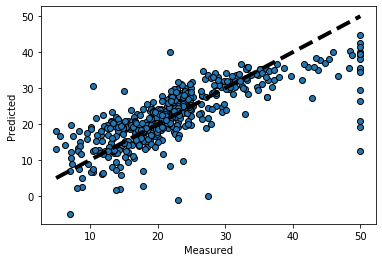

In [10]:
# try another regression
from sklearn.model_selection import cross_val_predict

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y = boston.target
predicted = cross_val_predict(regr, boston.data, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Try the Breast Cancer dataset

In [11]:
breast_cancer = datasets.load_breast_cancer()
breast_cancer.target.shape

(569,)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.1, random_state=4)
#regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print('Coefficients: ', regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Coefficients:  [ 1.68835597e-01 -2.47104416e-04 -1.40455380e-02 -5.28945672e-04
 -8.75672914e-01  3.69533926e+00 -1.50766134e+00 -1.00150567e+00
  2.06985795e-01 -2.21306041e+00 -5.52724261e-01  3.21126180e-02
  3.22937249e-02  1.13272268e-03 -1.82622595e+01 -9.76169145e-01
  3.63416824e+00 -1.31316890e+01 -9.83129744e-01  1.52838890e+01
 -2.02142885e-01 -1.14860447e-02  9.09100946e-04  1.12968308e-03
  1.10041018e-01  1.55490914e-01 -4.55942288e-01 -1.22118889e-01
 -7.62376123e-01 -4.88123450e+00]
Mean squared error: 0.06


In [13]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [14]:
x_train, x_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.1, random_state=4)
#logreg = linear_model.LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.8771929824561403
